# BOOK RATING PREDICTIONS

## Content

* Data exportation and exploration
* Data cleaning and feature engineering
* Data analysis and visualization
* Data preparation for our model
* Building Machine Learning Models and make predictions.
* Compare models accuracy on test data.



In [265]:
# Import package

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## 1. Exportation and data data exploration

In [319]:
# Read the data
df = pd.read_csv("books.csv")


In [320]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690.0,27591.0,9/16/2006,Scholastic Inc.;;;
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167.0,29221.0,9/1/2004,Scholastic Inc.;;;
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333.0,244.0,11/1/2003,Scholastic;;;
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585.0,36325.0,5/1/2004,Scholastic Inc.;;;
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428.0,164.0,9/13/2004,Scholastic;;;


In [321]:
#Print the shape of the dataFrame
df.shape

(11123, 12)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  object 
 1   title               11094 non-null  object 
 2   authors             11094 non-null  object 
 3   average_rating      11094 non-null  float64
 4   isbn                11094 non-null  object 
 5   isbn13              11094 non-null  float64
 6   language_code       11094 non-null  object 
 7     num_pages         11094 non-null  float64
 8   ratings_count       11094 non-null  float64
 9   text_reviews_count  11094 non-null  float64
 10  publication_date    11094 non-null  object 
 11  publisher;;;        11094 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


In [323]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11094.000000,1.109400e+04,11094.000000,1.109400e+04,11094.000000
mean,3.935026,9.759826e+12,336.543537,1.798750e+04,543.304309
std,0.346458,4.435532e+11,241.313733,1.126427e+05,2579.856004
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.050000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.490000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.018750e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


## Data cleaning and feature selection

In [324]:
# Check of there are null values

df.isna().sum()

bookID                 0
title                 29
authors               29
average_rating        29
isbn                  29
isbn13                29
language_code         29
  num_pages           29
ratings_count         29
text_reviews_count    29
publication_date      29
publisher;;;          29
dtype: int64

In [325]:
df[df.isna()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
#Let's drop those line 
df.dropna(inplace=True)

In [327]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher;;;          0
dtype: int64

In [328]:
# Check if there are redondant information
df.duplicated().sum()

0

In [329]:
#rename columns
df = df.rename(columns={'  num_pages': 'num_pages', 'publisher;;;': 'publisher'})

I decided to remove columns "Title", "authors", "bookID", "isbn", "isbn13", "publisher". I remove bookID, isbn and isbn13 because they are unique idenfier of each book and keeping them will force our model to learn information from each specific book, and trying to predict the rating of an unknown book will fail . I remove authors and publisher because i wanted my model to be able to predict the rating of a book with authors and publisher different than the one we had for our model training.

In [330]:
#Let's drop some columns

df = df.drop(columns=["title","authors","bookID","isbn","isbn13","publisher"])

In [331]:
df.columns

Index(['average_rating', 'language_code', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date'],
      dtype='object')

In [332]:
df.groupby(["language_code"])
df.language_code.value_counts()

eng      8885
en-US    1403
spa       218
en-GB     213
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
nl          1
srp         1
msa         1
glg         1
ale         1
gla         1
nor         1
wel         1
ara         1
tur         1
Name: language_code, dtype: int64

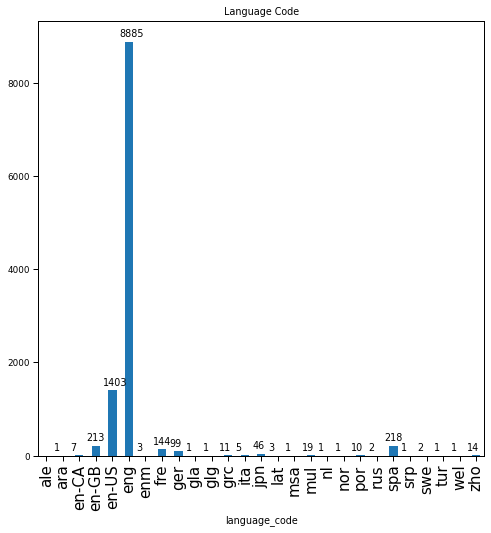

In [334]:
sns.set_context('paper')
plt.figure(figsize=(8,8))
ax = df.groupby('language_code')['language_code'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))
plt.show()

In [280]:
#Let's split our data in two type of language "eng" and "other"

language_code_value = ["eng","en-US","en-GB","en-CA"]
language_code_list = df.language_code.astype(str)
language_code = []
for elt in language_code_list :
    if (elt in language_code_value):
        language_code.append("eng")
    else :
        language_code.append("other")
df.language_code = language_code
df.language_code.astype(object)

0          eng
1          eng
2          eng
3          eng
4          eng
         ...  
11118      eng
11119      eng
11120      eng
11121      eng
11122    other
Name: language_code, Length: 11094, dtype: object

In [281]:
df.language_code.value_counts()

eng      10508
other      586
Name: language_code, dtype: int64

In [282]:

# In this cell i will split the data in two part according to the median publication_date
publication_date = df.publication_date.astype(str) #Change the columns type of the columns publication_date

publication_date_value = []
for elt in publication_date :
    publication_date_value.append((elt.split("/")[2])) #split it and take only the year
    
df.publication_date = publication_date_value


df["publication_date"] = pd.to_numeric(df["publication_date"])
df.publication_date.median() # Get the median publicatin date
publication_date_value = []
for elt in df.publication_date :
    if elt < 2003 :
        publication_date_value.append("<median_date")  
    else :
        publication_date_value.append(">median_date")
df["new_pub_date"] = publication_date_value    
df.new_pub_date.astype(object)
df = df.drop(columns = ["publication_date"])

In [283]:
df.new_pub_date.value_counts()

>median_date    5699
<median_date    5395
Name: new_pub_date, dtype: int64

In [284]:
df.head()

,average_rating,language_code,num_pages,ratings_count,text_reviews_count,new_pub_date
0,4.57,eng,652.0,2095690.0,27591.0,>median_date
1,4.49,eng,870.0,2153167.0,29221.0,>median_date
2,4.42,eng,352.0,6333.0,244.0,>median_date
3,4.56,eng,435.0,2339585.0,36325.0,>median_date
4,4.78,eng,2690.0,41428.0,164.0,>median_date


## Data analysis and visualization

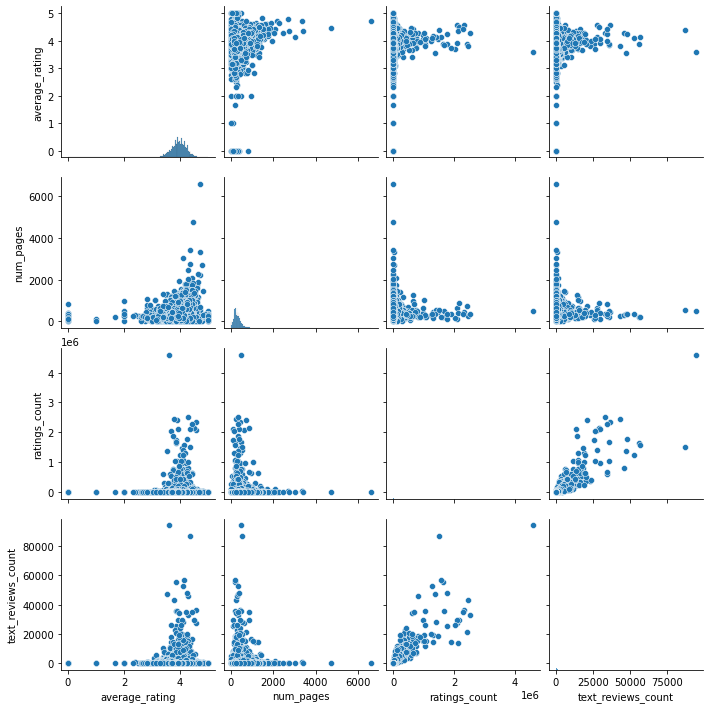

In [285]:
sns.pairplot(df);

In [286]:
df[df.average_rating == 0].count()

average_rating        23
language_code         23
num_pages             23
ratings_count         23
text_reviews_count    23
new_pub_date          23
dtype: int64

In [287]:
#Drop line with average rating equal to zero
df = df.drop(index=df[df.average_rating == 0].index)

In [288]:
df[df.ratings_count == 0].count()

average_rating        55
language_code         55
num_pages             55
ratings_count         55
text_reviews_count    55
new_pub_date          55
dtype: int64

In [289]:
#There are abnormal data those with ratings count == 0 and average_rating non equal to zero
df = df.drop(index=df[df.ratings_count == 0].index)

In [290]:
df[df.ratings_count == 0]



,average_rating,language_code,num_pages,ratings_count,text_reviews_count,new_pub_date


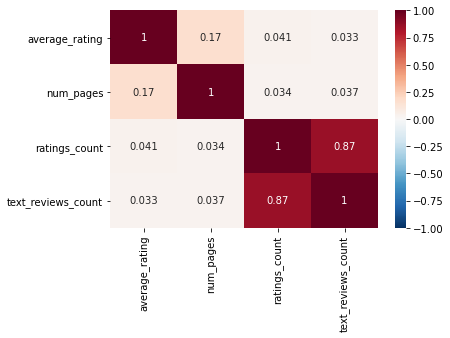

In [291]:
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

C:\programmesDev\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='new_pub_date'>

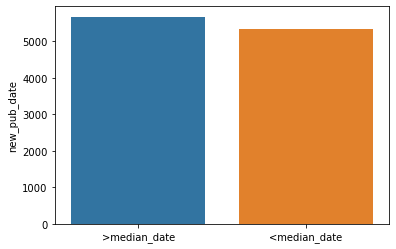

In [292]:
sns.barplot(df.new_pub_date.value_counts().index, df.new_pub_date.value_counts())

C:\programmesDev\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='language_code'>

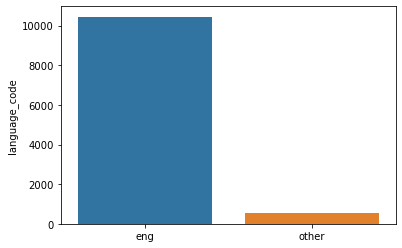

In [293]:
sns.barplot(df.language_code.value_counts().index, df.language_code.value_counts())

## Data preparation for our model

In [294]:
df = pd.concat([df,pd.get_dummies(df.language_code, drop_first=True)],axis=1).drop(columns="language_code")
df = pd.concat([df,pd.get_dummies(df.new_pub_date, drop_first=True)],axis=1).drop(columns="new_pub_date")
df_train, df_test = train_test_split(df,test_size = 0.2)

## Building Machine Learning Models and make predictions

In [298]:
def ModelBuilding_LinearRegression(df_train, df_test):
    # divide the data into attributes and labels
    X_train = df_train.drop(['average_rating'], axis = 1)
    y_train = df_train['average_rating']
    
    X_test = df_test.drop(['average_rating'], axis = 1)
    y_test = df_test['average_rating']
    
    
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    print("Intercept = {0}".format(linReg.intercept_))
    print("Coefficients = {0}".format(linReg.coef_.tolist()))
    predictions = linReg.predict(X_test)
    predictions_ytrain = linReg.predict(X_train)
    return (predictions, X_test, y_test,predictions_ytrain, linReg)

In [299]:
def ModelBuilding_RandomForest_Regressor(df_train, df_test):
    # divide the data into attributes and labels
    
    
    X_train = df_train.drop(['average_rating'], axis = 1)
    y_train = df_train['average_rating']
    
    
    X_test = df_test.drop(['average_rating'], axis = 1)
    y_test = df_test['average_rating']
    
    
    dr_model = RandomForestRegressor(n_estimators = 10, random_state=42)
    dr_model.fit(X_train, y_train)
    predictions = dr_model.predict(X_test)
    predictions_ytrain = dr_model.predict(X_train)
    return (predictions, X_test, y_test,predictions_ytrain,dr_model)

In [300]:
def ModelBuilding_DecisionTree_Regressor(df_train, df_test):
    # divide the data into attributes and labels
    
    
    X_train = df_train.drop(['average_rating'], axis = 1)
    y_train = df_train['average_rating']
    
    print("Shape of Inputs = {0}".format(X_train.shape))
    print("Shape of Target = {0}".format(y_train.shape))
    
    X_test = df_test.drop(['average_rating'], axis = 1)
    y_test = df_test['average_rating']
    
    print("Shape of Inputs = {0}".format(X_test.shape))
    print("Shape of Target = {0}".format(y_test.shape))
    
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    predictions = dt_model.predict(X_test)
    predictions_ytrain = dt_model.predict(X_train)
    return (predictions, X_test, y_test,predictions_ytrain, dt_model)

In [301]:
def ModelBuilding_RandomForest_Regressor_GreadSearch(df_train, df_test):
    # divide the data into attributes and labels
    
    
    X_train = df_train.drop(['average_rating'], axis = 1)
    y_train = df_train['average_rating']
    
    
    X_test = df_test.drop(['average_rating'], axis = 1)
    y_test = df_test['average_rating']
    
    dr_model = RandomForestRegressor()
    
    parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 12, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
    }

    grad_rf = GridSearchCV(dr_model, parameters, refit=True, cv=10)
    grad_rf.fit(X_train, y_train)

    predictions = grad_rf.predict(X_test)
    predictions_ytrain = grad_rf.predict(X_train)
    return (predictions, X_test, y_test,predictions_ytrain, grad_rf)

In [302]:
Pedicted_Scores_L, X_test_L, y_test_L,y_train_L, linReg = ModelBuilding_LinearRegression(df_train, df_test)
Pedicted_Scores_R, X_test_R, y_test_R,y_train_R, RandF = ModelBuilding_RandomForest_Regressor(df_train, df_test)
Pedicted_Scores_D, X_test_D, y_test_D,y_train_D, DecT = ModelBuilding_DecisionTree_Regressor(df_train, df_test)
Predicted_Scores_RG, X_test_RG, y_test_RG,y_train_RG, DecTRG = ModelBuilding_RandomForest_Regressor_GreadSearch(df_train, df_test)


Intercept = 3.882579102634076
Coefficients = [0.0002049704964565516, 1.5307417186795445e-07, -2.9586623567976157e-06, 0.04598021019709961, -0.01791495836983708]
Shape of Inputs = (8812, 5)
Shape of Target = (8812,)
Shape of Inputs = (2204, 5)
Shape of Target = (2204,)


In [340]:
# evaluate the performance of the LinearRegression
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_L, Pedicted_Scores_L))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_L, Pedicted_Scores_L))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_L, Pedicted_Scores_L)))


Mean Absolute Error (MAE): 0.22592631503034183
Mean Squared Error (MSE): 0.09190755936794066
Root Mean Squared Error (RMSE): 0.3031625955950712


In [341]:
# evaluate the performance of the Random Forest Regressor
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_R, Pedicted_Scores_R))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_R, Pedicted_Scores_R))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_R, Pedicted_Scores_R)))


Mean Absolute Error (MAE): 0.23472376091089792
Mean Squared Error (MSE): 0.101020021006866
Root Mean Squared Error (RMSE): 0.3178364689692893


In [342]:
# evaluate the performance of the Decision Tree Regressor
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_D, Pedicted_Scores_D))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_D, Pedicted_Scores_D))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_D, Pedicted_Scores_D)))


Mean Absolute Error (MAE): 0.30001209921355115
Mean Squared Error (MSE): 0.1588877243395846
Root Mean Squared Error (RMSE): 0.3986072306664602


In [306]:
# evaluate the performance of the Random Forest Gread Search
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_RG, Predicted_Scores_RG))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_RG, Predicted_Scores_RG))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test_RG, Predicted_Scores_RG))) 


Mean Absolute Error (MAE): 0.21615904142292475
Mean Squared Error (MSE): 0.08435912162125755
Root Mean Squared Error (RMSE): 0.2904464178144698
Model Score on Test Data:  0.10359497481468916


## score

In [336]:
l2 = []
l2.append(('Linear Regression', metrics.mean_squared_error(y_test_L, Pedicted_Scores_L)))
l2.append(('Random Forest', metrics.mean_squared_error(y_test_R, Pedicted_Scores_R)))
l2.append(('Decision tree regressor', metrics.mean_squared_error(y_test_D, Pedicted_Scores_D)))
l2.append(('Random Forest Gread Search', metrics.mean_squared_error(y_test_RG, Predicted_Scores_RG)))

Report = pd.DataFrame(l2, columns =['Model', 'Mean Squared Error (MSE)'])

In [337]:
Report

,Model,Mean Squared Error (MSE)
0,Linear Regression,0.091908
1,Random Forest,0.101020
2,Decision tree regressor,0.158888
3,Random Forest Gread Search,0.084359


From the report i will choose the Random Forest Gread Search Model because it is the one which has the lower Mean square error